# Data Augmentation

In [1]:
import os
import cv2
import csv
import glob
import keras
import pickle
import random

%matplotlib inline
from matplotlib import pyplot as plt

Using TensorFlow backend.


In [2]:
# Data path
data_path = 'data/custom/'

# Pickle file
train_pickle_file = 'train.p'

# Classes file
classes_file = 'classes.csv'

In [3]:
# Load classes
with open(os.path.join(data_path, classes_file), mode='r') as csv_file:
    reader = csv.reader(csv_file)
    classes = {rows[0]:rows[1] for rows in reader}

In [4]:
# Load train data
train_file = open(os.path.join(data_path, train_pickle_file), 'rb')
train_data = pickle.load(train_file)

In [5]:
# Data shape
print('x_train data shape:', train_data['features'].shape)
print('y_train data shape:', train_data['labels'].shape)

x_train data shape: (8505, 64, 64, 3)
y_train data shape: (8505,)


In [6]:
# Organize testing data
x_train = train_data['features']
y_train = train_data['labels']

In [7]:
# Make RGB values between 0 and 1
x_train = x_train.astype('float32')
x_train /= 255

In [8]:
# Convert labels to one hot encoding
y_train = keras.utils.to_categorical(y_train, 9)

### ImageDataGenerator

In [9]:
from keras.preprocessing.image import ImageDataGenerator

In [101]:
datagen = ImageDataGenerator(rotation_range=15,
                            #width_shift_range=0.15,
                            height_shift_range=0.15,
                            shear_range=0.15,
                            zoom_range=0.15)

In [102]:
datagen.fit(x_train)

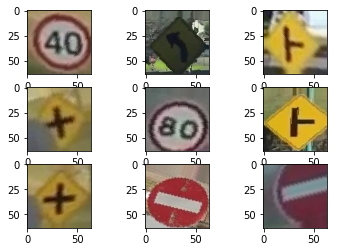

In [105]:
for x_batch, y_batch in datagen.flow(x_train, y_train, batch_size=32):
    # create a grid of 3x3 images
    for i in range(0, 9):
        plt.subplot(330 + 1 + i)
        plt.imshow(x_batch[i], cmap=plt.get_cmap('gray'))
    # show the plot
    plt.show()
    break